## Hierachical Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering as AC

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
X = df.iloc[:,-2:].values

* define function plot_dendogram

In [9]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

* Plot dendrogram

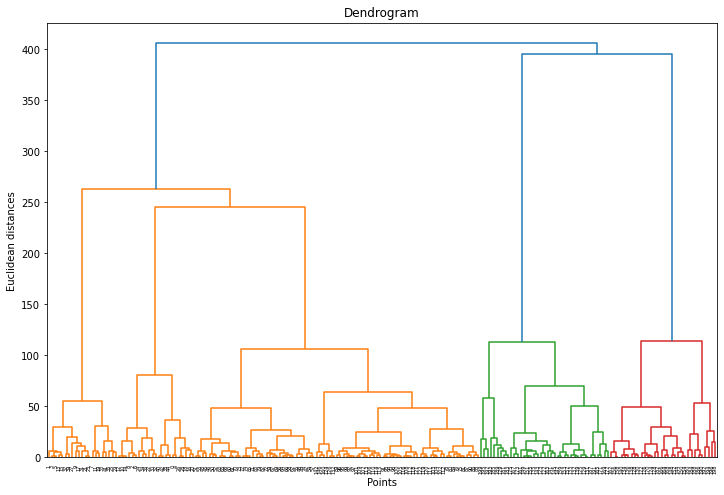

In [10]:
plot_dendrogram(X)

* Fit Hierarchical clustering with optimal number of clusters

In [21]:
ac = AC(affinity='euclidean',
        n_clusters=5,
        linkage='ward')

* define function plot_clusters

In [29]:
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

In [30]:
y_hc = ac.fit_predict(X)

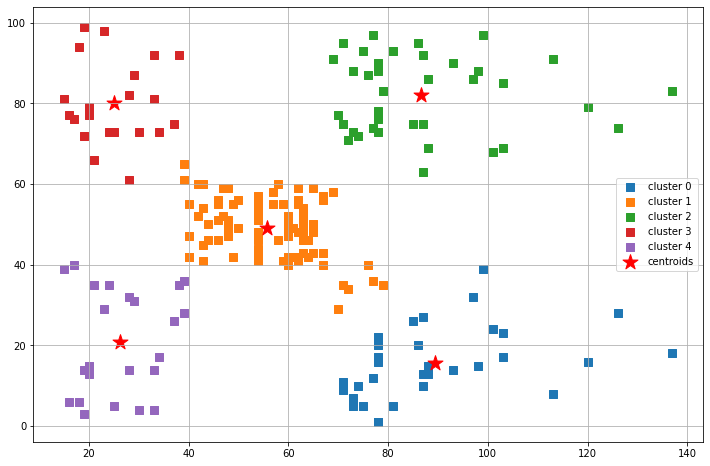

In [31]:
plot_clusters(X, y_hc, plt_cluster_centers=True)

In [50]:
# import make_moons from sklearn
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [51]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [60]:
db = DBSCAN(eps=1,
            min_samples=5,
            metric='euclidean')
            

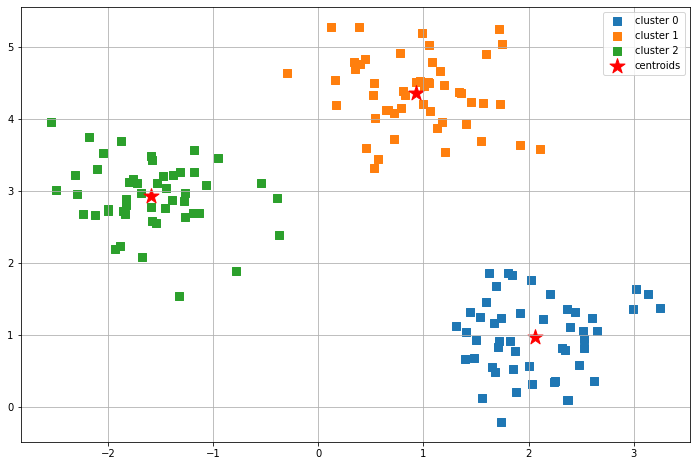

In [61]:
y_db = db.fit_predict(X)
plot_clusters(X, y_db)

## COMPARING ALGORITHMS WHEN CLUSTERS ARENT CIRCULAR

In [43]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

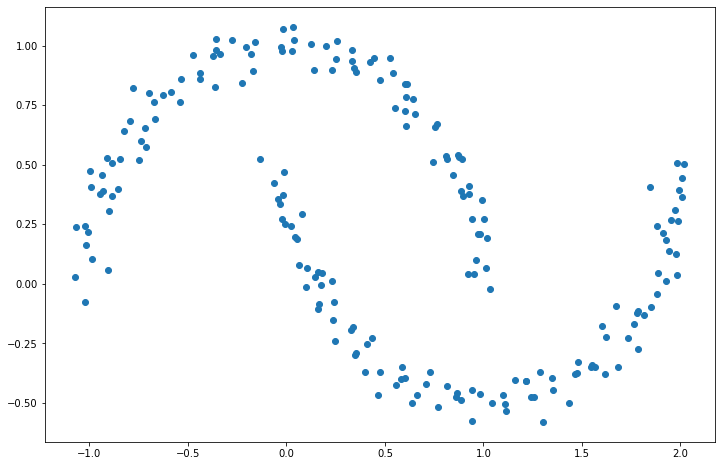

In [44]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## K_MEANS PERFORMANCE

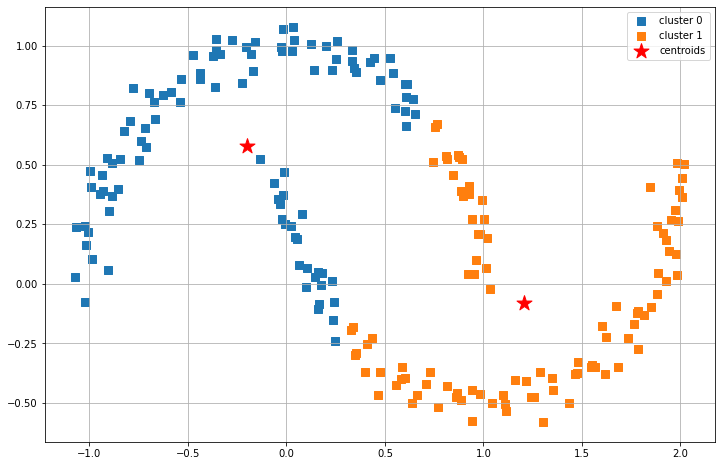

In [45]:
# import k-means
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)


## AGGLOMERATIVE PERFORMANCE

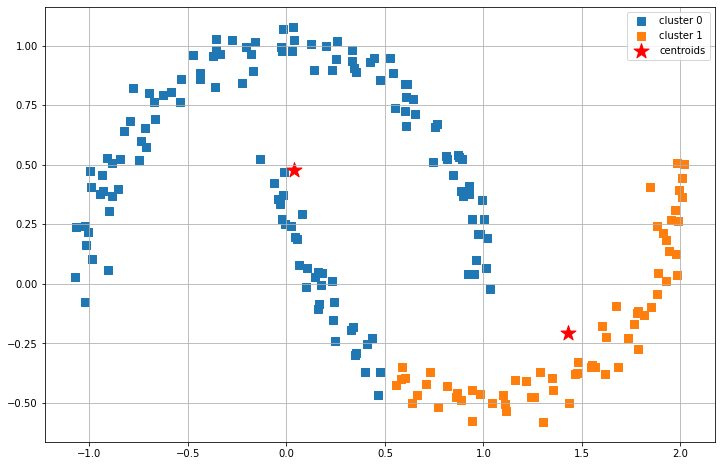

In [46]:
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)

## DBSCAN PERFORMANCE

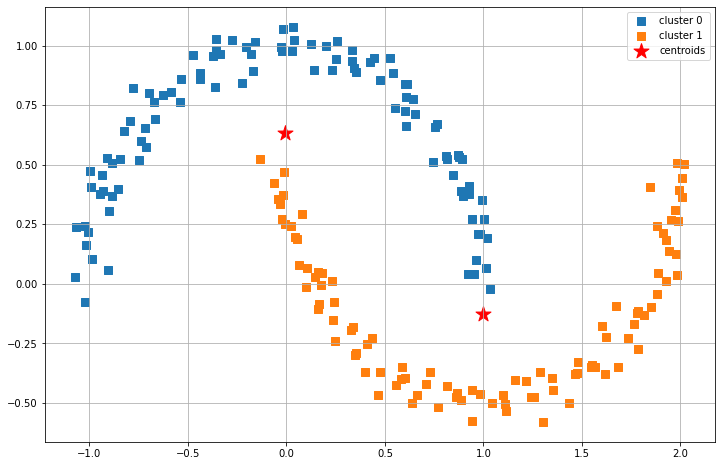

In [47]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)